**Pseudo $R^2$** is a measure used in statistical models, particularly when dealing with logistic regression or other non-linear models, to assess model fit. It is similar in concept to the traditional $R^2$ used in linear regression, but since logistic regression does not predict continuous outcomes, a direct $R^2$ value is not applicable. Various definitions of pseudo $R^2$ exist, with the most common ones being:

1. **McFadden's $R^2$**:
   $$
   R^2_{\text{McF}} = 1 - \frac{\ln L(\hat{\beta})}{\ln L(\hat{\beta_0})}
   $$
   - $L(\hat{\beta})$: Log-likelihood of the fitted model.
   - $L(\hat{\beta_0})$: Log-likelihood of the null model (intercept-only model).
   - The value ranges from 0 to 1, where 1 indicates perfect fit, and values closer to 0 suggest a poor fit.
   - $n$ is the number of observations.

2. **Cox and Snell's $R^2$**:
   $$
   R^2_{\text{CS}} = 1 - \left( \frac{L(\hat{\beta_0})}{L(\hat{\beta})} \right)^{2/n}
   $$
   - This measure also ranges from 0 to 1, but it may not reach 1 even in the case of a perfect fit.

3. **Nagelkerke's $R^2$**:
   $$
   R^2_{\text{Nag}} = \frac{R^2_{\text{CS}}}{1 - L(\hat{\beta_0})^{2/n}}
   $$
   - This is an adjusted version of Cox and Snell’s $R^2$ that scales it to a range of 0 to 1.

---

**Key Notes**:
- Pseudo $R^2$ values are often much lower than the $R^2$ in linear regression.
- Higher pseudo $R^2$ values indicate better model fit, but they should not be used as the sole indicator of model quality.
- They are particularly useful for comparing nested models or different models when analyzing categorical outcomes like in logistic regression.


In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.discrete.discrete_model import Logit
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

np.random.seed(47)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

# Customize plot settings for readability
plt.rc('axes', titlesize=16, labelsize=20, labelpad=12)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=12)
plt.rc('animation', embed_limit=200)

# Generate synthetic data
shape = (200, 1)
x1 = np.random.normal(1, 2, shape)
x2 = np.random.normal(2, 2, shape)
x3 = np.random.normal(3, 2, shape)
y = np.where((x1 + x2 + x3) > 6, 1, 0).flatten()
X = np.column_stack([np.ones_like(x1), x1, x2, x3])

In [2]:
model = Logit(y, X)
results = model.fit(method='bfgs', maxiter=1000, disp=False)

# Calculate Pseudo R² metrics
ll_model = results.llf
ll_null = results.llnull
n = len(y)

r2_mcfadden = 1 - (ll_model / ll_null)
r2_cox_snell = 1 - np.exp((ll_null - ll_model) * (2 / n))
r2_nagelkerke = r2_cox_snell / (1 - np.exp(ll_null * (2 / n)))

pseudo_r2_values = {
    "McFadden's R²": r2_mcfadden,
    "Cox & Snell's R²": r2_cox_snell,
    "Nagelkerke's R²": r2_nagelkerke
}

# Extract coefficients for logistic regression equation
intercept, w1, w2, w3 = results.params

# Create mesh grid for hyperplane
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calculate x3 values for the hyperplane
x3_grid = -(intercept + w1 * x1_grid + w2 * x2_grid) / w3

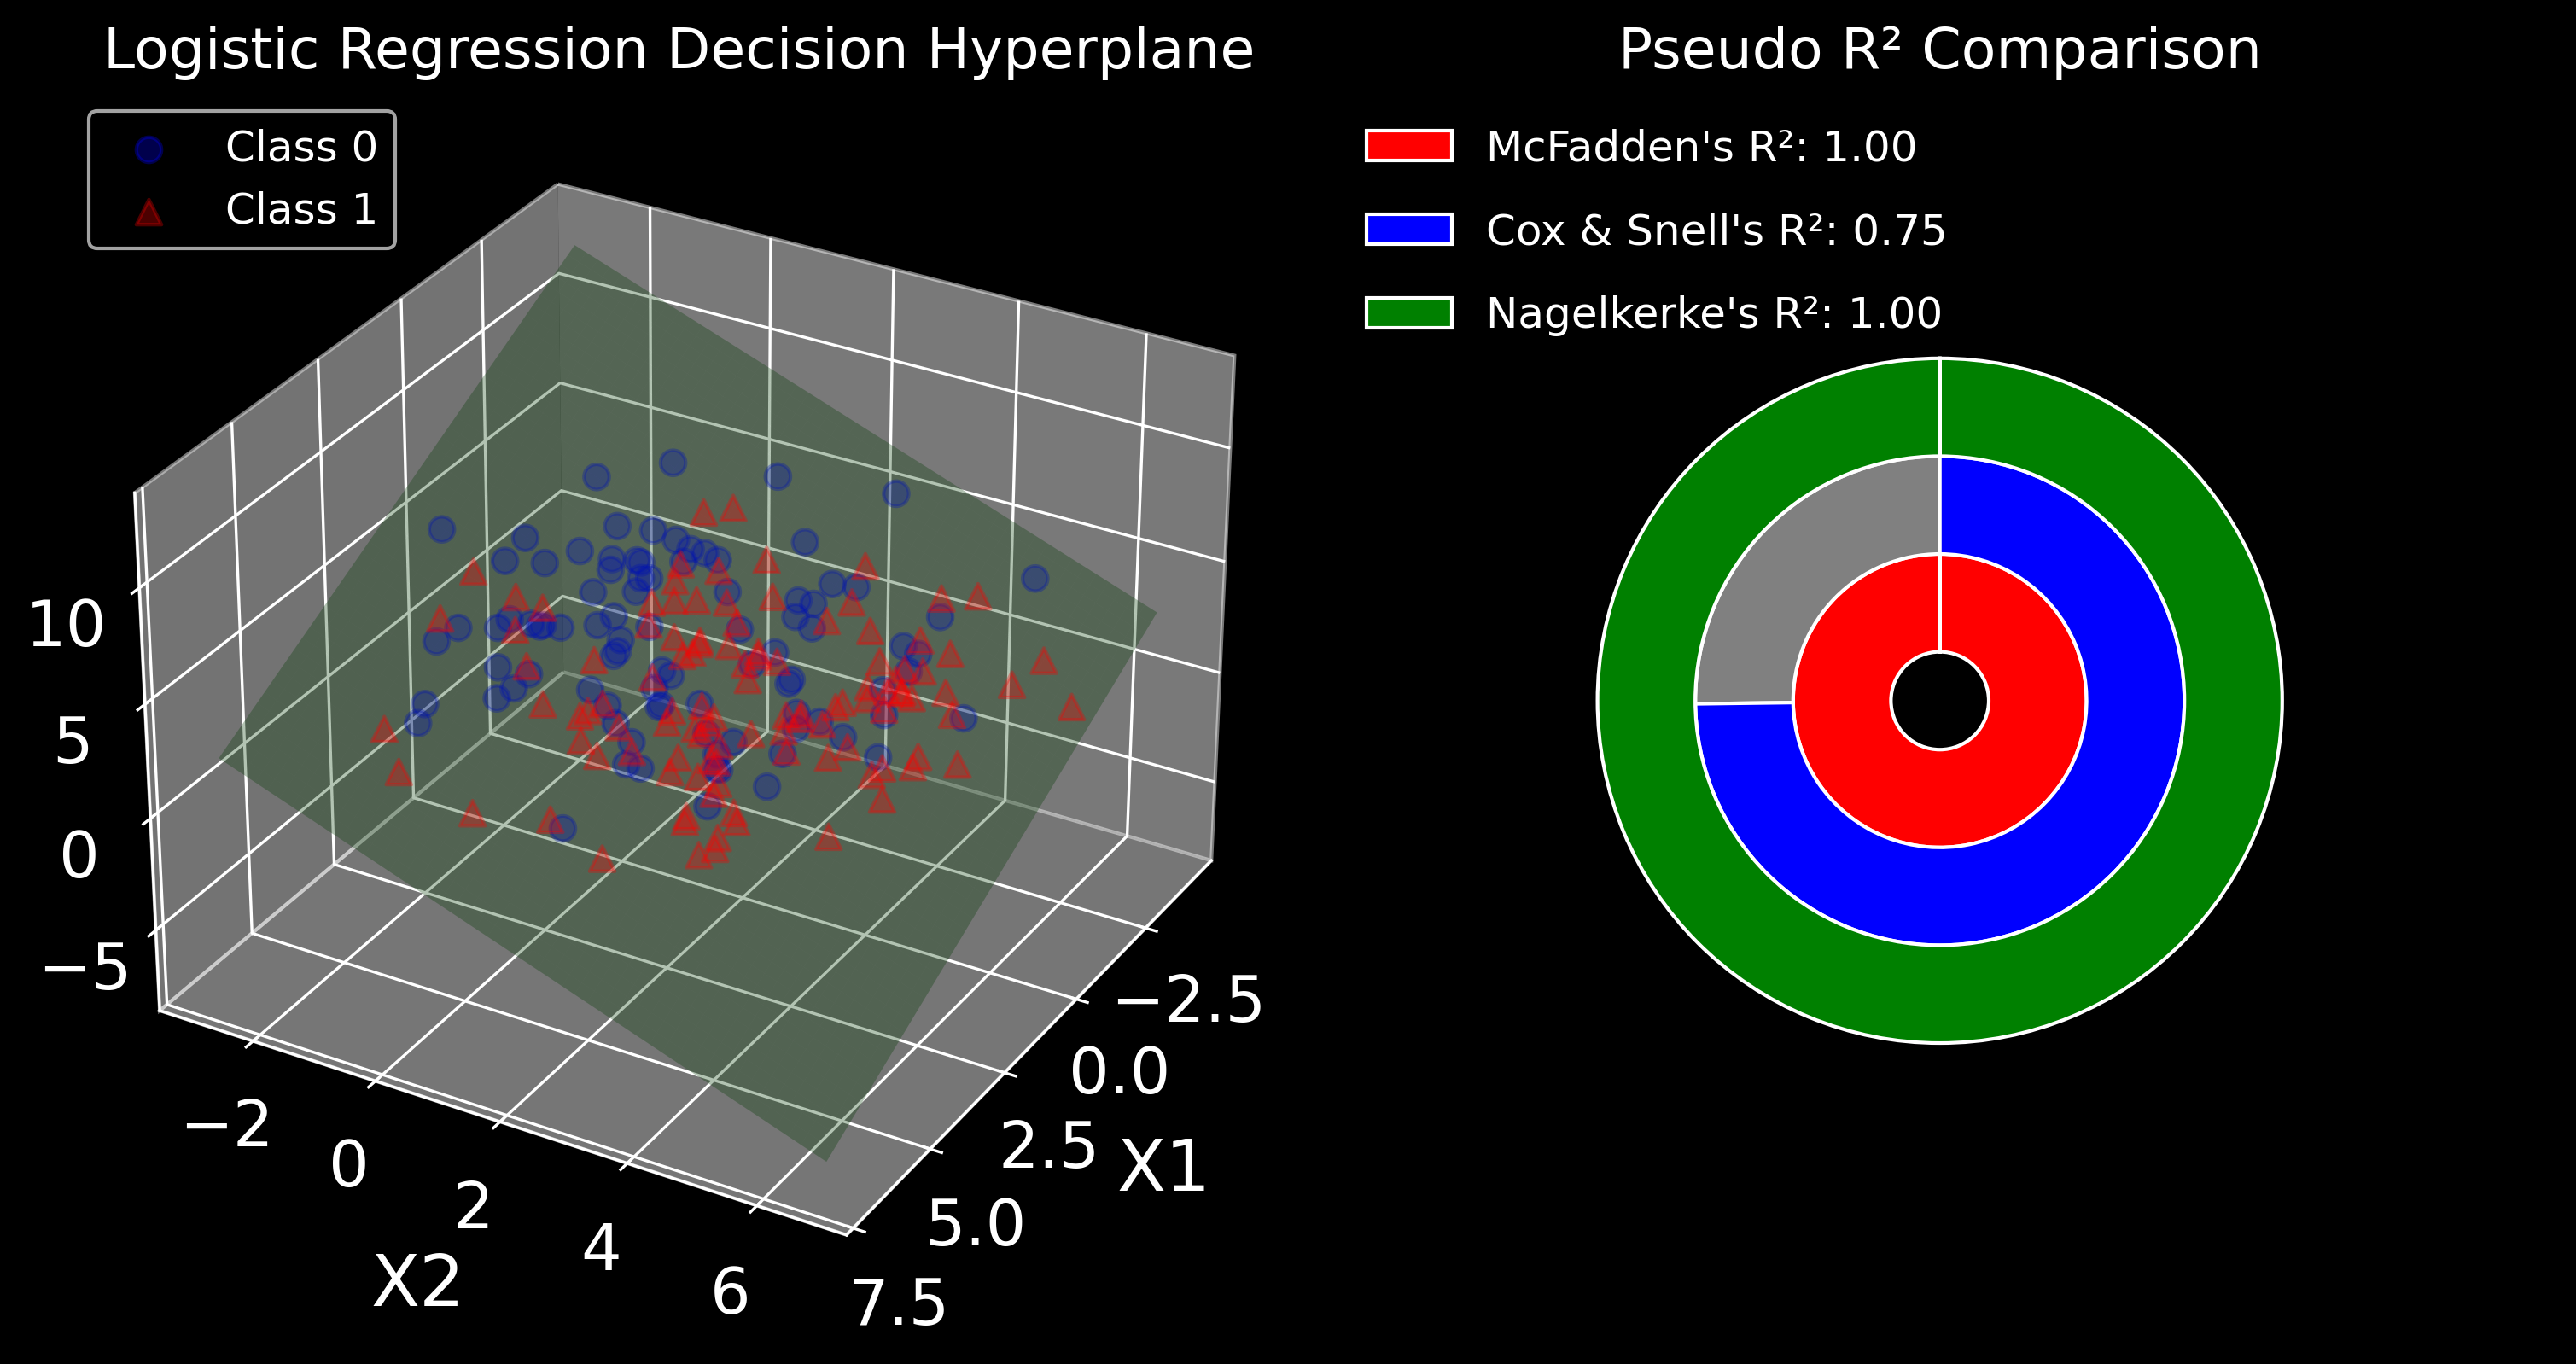

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi=300)

# --- Plot 1: 3D Logistic Regression Decision Hyperplane ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.view_init(elev=30, azim=30)
colors = ['blue', 'red']
markers = ['o', '^']

# Plot the classes and decision boundary
for label, marker, color in zip([0, 1], markers, colors):
    ax1.scatter(
        x1[y == label], x2[y == label], x3[y == label],
        c=color, label=f'Class {label}', 
        alpha=0.3, s=50, marker=marker
    )

# Plot the hyperplane
ax1.plot_surface(x1_grid, x2_grid, x3_grid, 
                 color='green', alpha=0.3)

# Set axis labels and title
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.set_title('Logistic Regression Decision Hyperplane')
ax1.legend(loc='upper left')

# --- Plot 2: Pseudo R² Comparison Pie Chart ---
ax2 = fig.add_subplot(122)  
wedges1, texts1 = ax2.pie([1 - r2_mcfadden, r2_mcfadden], radius=0.3, colors=['gray', 'red'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)
wedges2, texts2 = ax2.pie([1 - r2_cox_snell, r2_cox_snell], radius=0.5, colors=['gray', 'blue'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)
wedges3, texts3 = ax2.pie([1 - r2_nagelkerke, r2_nagelkerke], radius=0.7, colors=['gray', 'green'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)

ax2.set_title("Pseudo R² Comparison", fontsize=16, color='white')

ax2.legend(
    labels=[f"McFadden's R²: {r2_mcfadden:.2f}", f"Cox & Snell's R²: {r2_cox_snell:.2f}", f"Nagelkerke's R²: {r2_nagelkerke:.2f}"],
    handles=[wedges1[1], wedges2[1], wedges3[1]],
    loc='upper left', fontsize=12, frameon=False, facecolor='black', edgecolor='none', labelspacing=1
)

def update(frame):
    ax1.view_init(elev=30, azim=frame)
    ax2.pie([r2_mcfadden * frame / 360, 1 - r2_mcfadden * frame / 360], radius=0.3, colors=['red', 'gray'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)
    ax2.pie([r2_cox_snell * frame / 360, 1 - r2_cox_snell * frame / 360], radius=0.5, colors=['blue', 'gray'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)
    ax2.pie([r2_nagelkerke * frame / 360, 1 - r2_nagelkerke * frame / 360], radius=0.7, colors=['green', 'gray'], wedgeprops=dict(width=0.2, edgecolor='white'), startangle=90)

    ax2.set_title("Pseudo R² Comparison", fontsize=16, color='white')
    return [ax1, ax2]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), blit=False, interval=100)
plt.tight_layout()
plt.show()

**Pseudo $R^2$** is a measure used in statistical models, particularly when dealing with logistic regression or other non-linear models, to assess model fit. It is similar in concept to the traditional $R^2$ used in linear regression, but since logistic regression does not predict continuous outcomes, a direct $R^2$ value is not applicable. Various definitions of pseudo $R^2$ exist.

In [ ]:
Image(filename='logistic_regression_animation.gif')

**Pseudo $R^2$** is a measure used in statistical models, particularly when dealing with logistic regression or other non-linear models, to assess model fit. It is similar in concept to the traditional $R^2$ used in linear regression, but since logistic regression does not predict continuous outcomes, a direct $R^2$ value is not applicable. Various definitions of pseudo $R^2$ exist, with the most common ones being:

1. **McFadden's $R^2$**:
   $$
   R^2_{\text{McF}} = 1 - \frac{\ln L(\hat{\beta})}{\ln L(\hat{\beta_0})}
   $$
   - $L(\hat{\beta})$: Log-likelihood of the fitted model.
   - $L(\hat{\beta_0})$: Log-likelihood of the null model (intercept-only model).
   - The value ranges from 0 to 1, where 1 indicates perfect fit, and values closer to 0 suggest a poor fit.
   - $n$ is the number of observations.

2. **Cox and Snell's $R^2$**:
   $$
   R^2_{\text{CS}} = 1 - \left( \frac{L(\hat{\beta_0})}{L(\hat{\beta})} \right)^{2/n}
   $$
   - This measure also ranges from 0 to 1, but it may not reach 1 even in the case of a perfect fit.

3. **Nagelkerke's $R^2$**:
   $$
   R^2_{\text{Nag}} = \frac{R^2_{\text{CS}}}{1 - L(\hat{\beta_0})^{2/n}}
   $$
   - This is an adjusted version of Cox and Snell’s $R^2$ that scales it to a range of 0 to 1.

---

**Key Notes**:
- Pseudo $R^2$ values are often much lower than the $R^2$ in linear regression.
- Higher pseudo $R^2$ values indicate better model fit, but they should not be used as the sole indicator of model quality.
- They are particularly useful for comparing nested models or different models when analyzing categorical outcomes like in logistic regression.
